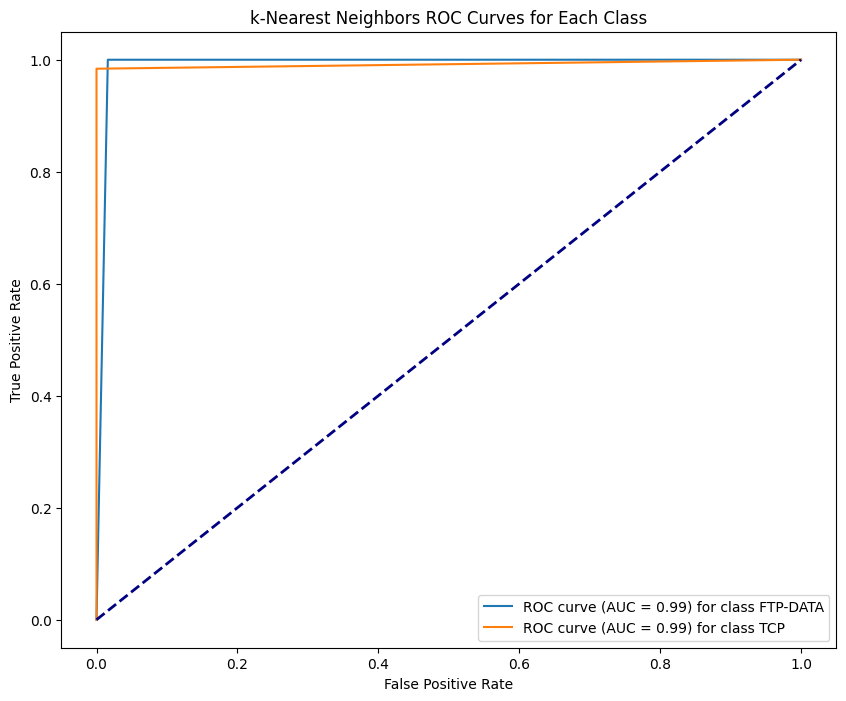

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', sep=',')

# Filter data for specific protocol types
selected_protocols = ['TCP', 'FTP-DATA', 'tcp', 'ftp']
filtered_data = data[data['Protocol'].isin(selected_protocols)]

# Preprocess the data
X = filtered_data[['Source', 'Destination', 'Length']]  # Features
y = filtered_data['Protocol']  # Target variable

# Apply one-hot encoding to categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets based on protocol and ips accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the k-Nearest Neighbors model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Calculate the probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, protocol in enumerate(model.classes_):
    fpr[protocol], tpr[protocol], _ = roc_curve(y_test == protocol, y_prob[:, i])
    roc_auc[protocol] = auc(fpr[protocol], tpr[protocol])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for protocol in model.classes_:
    plt.plot(fpr[protocol], tpr[protocol], label=f'ROC curve (AUC = {roc_auc[protocol]:.2f}) for class {protocol}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-Nearest Neighbors ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

